ML models predicting survival on titanic

In [121]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [122]:
titanic = pd.read_csv('train.csv')

In [123]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Database description

In [124]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First 5 rows from database

In [125]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


All columns

In [126]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking if there are missing values

In [127]:
titanic.loc[pd.isnull(titanic.Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [128]:
titanic.loc[pd.isnull(titanic.Fare)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [129]:
titanic.loc[pd.isnull(titanic.Cabin)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Filling missing values

In [130]:
titanic.Age.fillna('Unknown')
titanic.Fare.fillna('Unknown')

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [131]:
titanic.Sex.replace(to_replace='male',value=1, inplace=True)
titanic.Sex.replace(to_replace='female', value=2, inplace=True)
titanic.Sex.replace(to_replace='Unknown', value=0, inplace=True)
titanic.Age.replace(to_replace=np.NaN, value=titanic.Age.median(), inplace=True)

Droping Cabin column because missing values are almost all 

In [132]:
titanic.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


Analyzing Data by plots

Bar plot - Survived based on age and sex

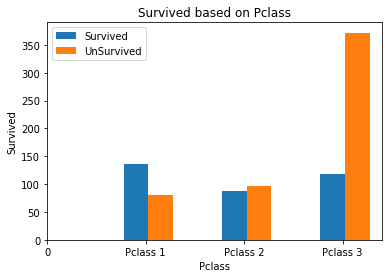

In [133]:
Class1_s = titanic.loc[(titanic.Pclass == 1) & (titanic.Survived == 1), ['Pclass']].size
Class1_uns = titanic.loc[(titanic.Pclass == 1) & (titanic.Survived == 0), ['Pclass']].size

Class2_s = titanic.loc[(titanic.Pclass == 2) & (titanic.Survived == 1), ['Pclass']].size
Class2_uns = titanic.loc[(titanic.Pclass == 2) & (titanic.Survived == 0), ['Pclass']].size

Class3_s = titanic.loc[(titanic.Pclass == 3) & (titanic.Survived == 1), ['Pclass']].size
Class3_uns = titanic.loc[(titanic.Pclass == 3) & (titanic.Survived == 0), ['Pclass']].size

barWidth = 0.25

Survived = [Class1_s, Class2_s, Class3_s]
x_axis1= [1, 2, 3]
x_axis2 = [x + barWidth for x in x_axis1]
UnSurvived = [Class1_uns, Class2_uns, Class3_uns]

barWidth = 0.25
fig = plt.subplots()

plt.bar(x_axis1, Survived, width=barWidth, label='Survived')
plt.bar(x_axis2, UnSurvived, width=barWidth, label='UnSurvived')
plt.xticks([r + 0.1 for r in range(len(x_axis1)+1)], ['0', 'Pclass 1', 'Pclass 2', 'Pclass 3'])
plt.ylabel("Survived")
plt.xlabel('Pclass')
plt.title('Survived based on Pclass')
plt.legend()

Survived based on Age

In [134]:
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

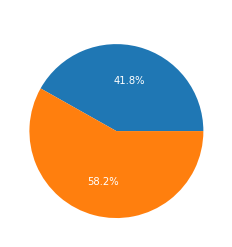

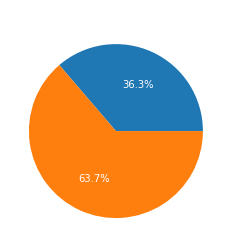

In [135]:
age_less_than_27_survived = titanic.loc[(titanic.Age <= 27) & (titanic.Survived == 1), 'Survived'].size
age_less_than_27_dead = titanic.loc[(titanic.Age <= 27) & (titanic.Survived == 0), 'Survived'].size
age_more_than_27_survived = titanic.loc[(titanic.Age > 27) & (titanic.Survived == 1), 'Survived'].size
age_more_than_27_dead = titanic.loc[(titanic.Age > 27) & (titanic.Survived == 0), 'Survived'].size

pie_less_27 = [age_less_than_27_survived, age_less_than_27_dead]
labels1 = ['Survived', 'Dead']

plt.pie(pie_less_27, labels=labels1, autopct='%1.1f%%', textprops=dict(color="w"))
plt.title(label="Survived based on Age (Age <= 27)", color='w')
plt.show()

pie_more_27 = [age_more_than_27_survived, age_more_than_27_dead]

plt.pie(pie_more_27, labels=labels1, autopct='%1.1f%%', textprops=dict(color="w"))
plt.title(label="Survived based on Age (Age > 27)", color='w')
plt.show()

Survived based on Sex

In [136]:
titanic.loc[titanic.Survived == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",2,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",2,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",2,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S


Sex = 1 mean Male and Sex = 2 mean Female

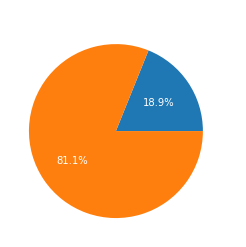

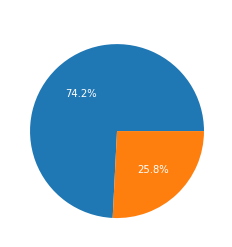

In [137]:
male_survived = titanic.loc[(titanic.Sex == 1) & (titanic.Survived == 1), 'Survived'].size
male_dead = titanic.loc[(titanic.Sex == 1) & (titanic.Survived == 0), 'Survived'].size

female_survived = titanic.loc[(titanic.Sex == 2) & (titanic.Survived == 1), 'Survived'].size
female_dead = titanic.loc[(titanic.Sex == 2) & (titanic.Survived == 0), 'Survived'].size

Male = [male_survived, male_dead]
Female = [female_survived, female_dead]
labels2 = ['Survived', 'Dead']

plt.pie(Male, labels=labels2, autopct='%1.1f%%', textprops=dict(color='w'))
plt.title(label='Survived based on Sex (Male)', color='w')
plt.show()

plt.pie(Female, labels=labels2, autopct='%1.1f%%', textprops=dict(color='w'))
plt.title(label='Survived based on Sex (Female)', color='w')
plt.show()

Decision Tree Classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = ['Sex', 'Age', 'Pclass']

X = titanic[features]
y = titanic.Survived

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)

dec_tree_model = DecisionTreeClassifier()


dec_tree_model = DecisionTreeClassifier(random_state=1)
dec_tree_model.fit(train_X, train_y)
pred_dec_tree = dec_tree_model.predict(val_X)

print(val_y)
print(pred_dec_tree)
print("MAE for Decision Tree Classifier: {0}".format(mean_absolute_error(val_y, pred_dec_tree)))
print("Accuracy score for Decision Tree Classifier: {0}".format(accuracy_score(val_y, pred_dec_tree)))

207    1
613    0
612    1
124    0
792    0
      ..
433    0
369    1
696    0
26     0
103    0
Name: Survived, Length: 179, dtype: int64
[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0]
MAE for Decision Tree Classifier: 0.17318435754189945
Accuracy score for Decision Tree Classifier: 0.8268156424581006


Confusion Matrix for Decision Tree Classfier

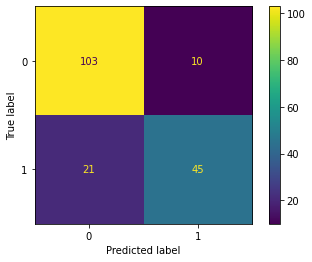

In [139]:
cm_dec = confusion_matrix(val_y, pred_dec_tree, labels=dec_tree_model.classes_)
disp_cm_dec = ConfusionMatrixDisplay(confusion_matrix=cm_dec, display_labels=dec_tree_model.classes_ )
disp_cm_dec.plot()
plt.show()

Random Forest

In [140]:
rn_forest_model = RandomForestClassifier(random_state=1)
rn_forest_model.fit(train_X, train_y)
pred_rn_forest = rn_forest_model.predict(val_X)

print(val_y)
print(pred_rn_forest)
print("MAE for Random Forest: {0}".format(mean_absolute_error(val_y, pred_rn_forest)))
print("Accuracy score fot Random Forest: {0}".format(accuracy_score(val_y, pred_rn_forest)))

207    1
613    0
612    1
124    0
792    0
      ..
433    0
369    1
696    0
26     0
103    0
Name: Survived, Length: 179, dtype: int64
[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0]
MAE for Random Forest: 0.18435754189944134
Accuracy score fot Random Forest: 0.8156424581005587


Confusion Matrix for Random Forest

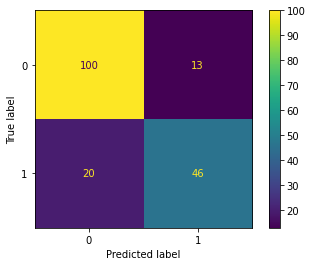

In [141]:
cm_rn = confusion_matrix(val_y, pred_rn_forest, labels=rn_forest_model.classes_)
disp_cm_rn= ConfusionMatrixDisplay(confusion_matrix=cm_rn, display_labels=rn_forest_model.classes_)
disp_cm_rn.plot()
plt.show()

SVC

In [142]:
svc_model = SVC(random_state=1)
svc_model.fit(train_X, train_y)
pred_svc = svc_model.predict(val_X)

print(val_y)
print(pred_svc)
print("MAE for SVC: {0}".format(mean_absolute_error(val_y, pred_svc)))
print("Accuracy score for SVC: {0}".format(accuracy_score(val_y, pred_svc)))

207    1
613    0
612    1
124    0
792    0
      ..
433    0
369    1
696    0
26     0
103    0
Name: Survived, Length: 179, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
MAE for SVC: 0.35195530726256985
Accuracy score for SVC: 0.6480446927374302


Confusion Matrix for SVC

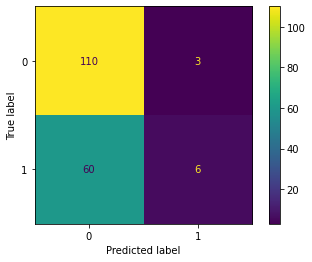

In [143]:
cm_svc = confusion_matrix(val_y, pred_svc, labels=svc_model.classes_)
disp_cm_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_model.classes_)
disp_cm_svc.plot()
plt.show()